<a href="https://colab.research.google.com/github/ShylaSreeGitHub/Chatbot-Using-Pytorch/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import numpy as np

In [64]:
import matplotlib.pyplot as plt

In [65]:
from tensorflow.keras import layers, models, optimizers, utils, datasets

In [66]:
NUM_CLASSES = 10

In [67]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [68]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [69]:
y_train = utils.to_categorical(y_train, NUM_CLASSES)
y_test = utils.to_categorical(y_test, NUM_CLASSES)

In [70]:
display(x_train[:10])
print(y_train[:10])

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


ReLU

In [71]:
input_layer = layers.Input((32, 32, 3))

x = layers.Flatten()(input_layer)
x = layers.Dense(200, activation="relu")(x)
x = layers.Dense(150, activation="relu")(x)

output_layer = layers.Dense(NUM_CLASSES, activation="softmax")(x)

model = models.Model(input_layer, output_layer)

model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 200)            │       614,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 150)            │        30,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 646,260 (2.47 MB)

 Trainable params: 646,260 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

In [72]:
opt = optimizers.Adam(learning_rate=0.0005)
model.compile(
    loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"]
)

In [73]:
model.fit(x_train, y_train, batch_size=32, epochs=10, shuffle=True)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.2815 - loss: 1.9725
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.3947 - loss: 1.6969
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.4301 - loss: 1.5991
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.4507 - loss: 1.5368
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.4671 - loss: 1.4984
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.4806 - loss: 1.4610
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.4853 - loss: 1.4403
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.4968 - loss: 1.4107
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.5048 - loss: 1.3918
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.5091 - loss: 1.3776


In [74]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4948 - loss: 1.4277


[1.4372533559799194, 0.48980000615119934]

ReLU standards for Rectified Linear Unit. If input is negative, then output is 0; if input is positive, then output = input.

Explanation:

I built and trained a Multilayer Perceptron (MLP) to classify images from the CIFAR-10 dataset. To prepare the data, I normalized the images so their pixel values were between 0 and 1, and converted the class labels into one-hot encoded vectors. The network included two hidden layers with ReLU activation, and its output layer used softmax for multi-class classification. I trained the model for 10 epochs using the Adam optimizer and categorical cross-entropy loss. After training, the model evaluated 49.48% accuracy on the test set, with a loss of 1.4277. To see how well it worked, I visualized some test images with both their predicted and actual labels. Also, if the input is negative, we are outputting to 0, where model stops learning, which is a disadvantage.

Observation:
1.Test accuracy is aroung 49% on the image classification task.
2. Some test images were classified correctly, while others were misclassified.
3.The training loss gradually decreased across epochs, which indicates that the model was learning.
4. The ReLU activation function helps the model learn faster by reducing vanishing gradient problems.



In [75]:
CLASSES = np.array(
    [
        "airplane",
        "automobile",
        "bird",
        "cat",
        "deer",
        "dog",
        "frog",
        "horse",
        "ship",
        "truck",
    ]
)

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

correct_count_total = np.sum(preds_single == actual_single)
total_images = len(x_test)

print(f"Correct predictions: {correct_count_total}")
print(f"Total test images: {total_images}")
print(f"Accuracy from counting: {correct_count_total / total_images:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Correct predictions: 4898
Total test images: 10000
Accuracy from counting: 0.4898


Number of correct predictions out of 10: 5


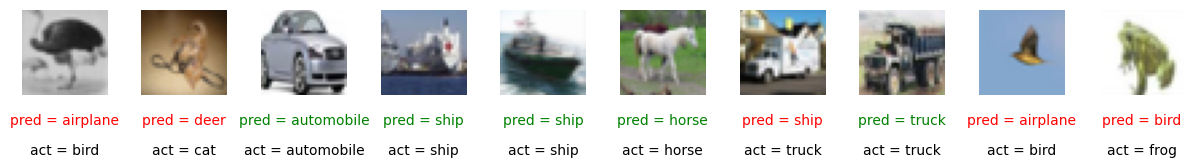

In [76]:
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

correct_count = 0

for i, idx in enumerate(indices):
    img = x_test[idx]

    pred_label = preds_single[idx]
    actual_label = actual_single[idx]

    if pred_label == actual_label:
        correct_count += 1

    ax = fig.add_subplot(1, n_to_show, i + 1)
    ax.axis("off")

    color = "green" if pred_label == actual_label else "red"
    ax.text(
        0.5,
        -0.35,
        "pred = " + str(preds_single[idx]),
        fontsize=10,
        ha="center",
        color=color,
        transform=ax.transAxes,
    )
    ax.text(
        0.5,
        -0.7,
        "act = " + str(actual_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.imshow(img)
print(f"Number of correct predictions out of {n_to_show}: {correct_count}")

LeakyReLU


In [77]:
(a_train, b_train), (a_test, b_test) = datasets.cifar10.load_data()
a_train, a_test = a_train/255.0, a_test/255.0
b_train, b_test = utils.to_categorical(b_train, NUM_CLASSES), utils.to_categorical(b_test, NUM_CLASSES)


In [78]:
input_layer = layers.Input(shape=(32,32,3))
x = layers.Flatten()(input_layer)

In [82]:
x = layers.Dense(200)(x)
x = layers.LeakyReLU(negative_slope=0.01)(x)

x = layers.Dense(150)(x)
x = layers.LeakyReLU(negative_slope=0.01)(x)

output_layer = layers.Dense(NUM_CLASSES, activation='softmax')(x)
model_leaky = models.Model(input_layer, output_layer)

In [84]:
model_leaky.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.Adam(0.0005),
    metrics=['accuracy']
)

In [85]:
history_leaky = model_leaky.fit(
    a_train, b_train,
    batch_size=32,
    epochs=10,
    shuffle=True,
    validation_data=(a_test, b_test)
)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 17ms/step - accuracy: 0.2285 - loss: 2.0341 - val_accuracy: 0.3488 - val_loss: 1.8040
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 15ms/step - accuracy: 0.3507 - loss: 1.7785 - val_accuracy: 0.3770 - val_loss: 1.7191
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.3909 - loss: 1.6774 - val_accuracy: 0.3941 - val_loss: 1.6746
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.4197 - loss: 1.6105 - val_accuracy: 0.4331 - val_loss: 1.5773
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.4402 - loss: 1.5539 - val_accuracy: 0.4412 - val_loss: 1.5525
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.4514 - loss: 1.5218 - val_accuracy: 0.4642 - val_loss: 1.5114
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - accuracy: 0.4711 - loss: 1.4707 - val_accuracy: 0.4678 - val_loss: 1.5129
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.4830 -

In [87]:
loss, acc = model_leaky.evaluate(a_test, b_test)
print("LeakyReLU Test Accuracy:", acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4654 - loss: 1.5204
LeakyReLU Test Accuracy: 0.46230000257492065


LeakyReLU:
For positive input, it acts like a ReLU, output = input.
For negative input, it sort of “leaks” a small portion of the input instead of outputting zero, we output = 0.01 x input (based on alpha).

Explanation:

I trained an MLP model on the CIFAR-10 dataset with LeakyReLU in hidden layers. ReLU returns zero for negative input, while LeakyReLU forward computes non-zero value and allows small non-zero gradients with negative inputs. In the above code, for alpha=0.01, if the input is negative then 0.01*input will be output.

The images are normalized (dividing pixel values by 255) and converted to one-hot labels. The network is with two dense hidden layers with LeakyReLU activation, and a softmax output layer for 10-class classification. We trained the model with ADAM optimizer (lr = 0.0005) and categorical cross-entropy loss.

The model got 46.54% accuracy and losss of 1.5204 on test data after 10 epochs, slightly more than the ReLU model.

Observation:

1. LeakyReLU allows small gradients for negative inputs, preventing neurons from "stopping learning".

2. LeakyReLU's accuracy is low, and the loss is high when compared to ReLU.


In [90]:
CLASSES = np.array(
    [
        "airplane",
        "automobile",
        "bird",
        "cat",
        "deer",
        "dog",
        "frog",
        "horse",
        "ship",
        "truck",
    ]
)

preds = model.predict(a_test)
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(b_test, axis=-1)]

correct_count_total = np.sum(preds_single == actual_single)
total_images = len(a_test)

print(f"Correct predictions: {correct_count_total}")
print(f"Total test images: {total_images}")
print(f"Accuracy from counting: {correct_count_total / total_images:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Correct predictions: 4898
Total test images: 10000
Accuracy from counting: 0.4898


Number of correct predictions out of 10: 4


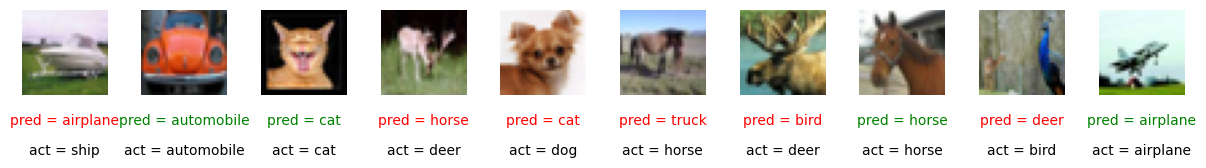

In [91]:
n_to_show = 10
indices = np.random.choice(range(len(a_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

correct_count = 0

for i, idx in enumerate(indices):
    img = a_test[idx]

    pred_label = preds_single[idx]
    actual_label = actual_single[idx]

    if pred_label == actual_label:
        correct_count += 1

    ax = fig.add_subplot(1, n_to_show, i + 1)
    ax.axis("off")

    color = "green" if pred_label == actual_label else "red"
    ax.text(
        0.5,
        -0.35,
        "pred = " + str(preds_single[idx]),
        fontsize=10,
        ha="center",
        color=color,
        transform=ax.transAxes,
    )
    ax.text(
        0.5,
        -0.7,
        "act = " + str(actual_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.imshow(img)
print(f"Number of correct predictions out of {n_to_show}: {correct_count}")

Sigmoid

In [92]:
(m_train, n_train), (m_test, n_test) = datasets.cifar10.load_data()
m_train, m_test = m_train/255.0, m_test/255.0
n_train, n_test = utils.to_categorical(n_train, NUM_CLASSES), utils.to_categorical(n_test, NUM_CLASSES)


In [93]:
input_layer = layers.Input(shape=(32,32,3))
x = layers.Flatten()(input_layer)

In [94]:
x = layers.Dense(200, activation='sigmoid')(x)
x = layers.Dense(150, activation='sigmoid')(x)

In [95]:
output_layer = layers.Dense(NUM_CLASSES, activation='softmax')(x)
model_sigmoid = models.Model(input_layer, output_layer)

In [96]:
model_sigmoid.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.Adam(0.0005),
    metrics=['accuracy']
)

In [97]:
history_sigmoid = model_sigmoid.fit(
    m_train, n_train,
    batch_size=32,
    epochs=10,
    shuffle=True,
    validation_data=(m_test, n_test)
)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.2833 - loss: 1.9818 - val_accuracy: 0.3870 - val_loss: 1.7130
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.3948 - loss: 1.6945 - val_accuracy: 0.4264 - val_loss: 1.6080
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.4286 - loss: 1.6046 - val_accuracy: 0.4440 - val_loss: 1.5581
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.4477 - loss: 1.5501 - val_accuracy: 0.4528 - val_loss: 1.5324
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.4589 - loss: 1.5147 - val_accuracy: 0.4528 - val_loss: 1.5380
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.4689 - loss: 1.4951 - val_accuracy: 0.4667 - val_loss: 1.5007
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.4837 - loss: 1.4516 - val_accuracy: 0.4538 - val_loss: 1.5302
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.4859 -

In [98]:
loss, acc = model_sigmoid.evaluate(m_test, n_test)
print("Sigmoid Test Accuracy:", acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4819 - loss: 1.4569
Sigmoid Test Accuracy: 0.4814000129699707


SIGMOID
Fits any input value into a range between 0 and 1.It is used when we want output to behave like probabilities.

Explanation:

I trained a simple neural network (MLP) on the CIFAR-10 image dataset using the sigmoid activation function in the hidden layers. Sigmoid takes any input and fits into a value between 0 and 1. The network has two fully connected layers with sigmoid and a softmax output layer to classify the images into 10 classes.

We first normalized the images, so pixel values are between 0 and 1 and converted the labels to one-hot encoding. The model was trained with the Adam optimizer and categorical cross-entropy loss for 10 epochs. After training, the model evaluated about 48.19% accuracy and loss of 1.4569 on the test dataset.

Observation:

1. Accuracy (48.19%) is slightly lower than the ReLU (49.4%) and higher than LeakyReLU (46.54%) models.
2. The loss decreases steadily, showing the network is learning, but slower compared to ReLU or LeakyReLU.


In [60]:
CLASSES = np.array(
    [
        "airplane",
        "automobile",
        "bird",
        "cat",
        "deer",
        "dog",
        "frog",
        "horse",
        "ship",
        "truck",
    ]
)

preds = model.predict(m_test)
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(n_test, axis=-1)]

correct_count_total = np.sum(preds_single == actual_single)
total_images = len(m_test)

print(f"Correct predictions: {correct_count_total}")
print(f"Total test images: {total_images}")
print(f"Accuracy from counting: {correct_count_total / total_images:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Correct predictions: 4917
Total test images: 10000
Accuracy from counting: 0.4917


Number of correct predictions out of 10: 3


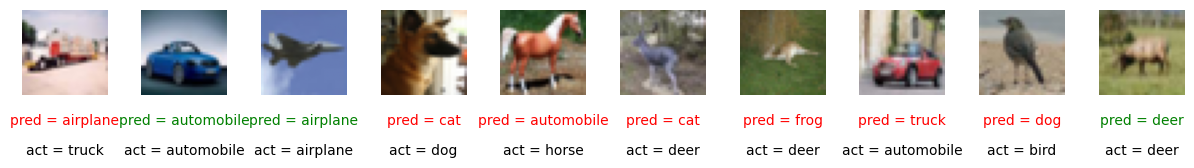

In [100]:
n_to_show = 10
indices = np.random.choice(range(len(m_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

correct_count = 0

for i, idx in enumerate(indices):
    img = m_test[idx]

    pred_label = preds_single[idx]
    actual_label = actual_single[idx]

    if pred_label == actual_label:
        correct_count += 1

    ax = fig.add_subplot(1, n_to_show, i + 1)
    ax.axis("off")

    color = "green" if pred_label == actual_label else "red"
    ax.text(
        0.5,
        -0.35,
        "pred = " + str(preds_single[idx]),
        fontsize=10,
        ha="center",
        color=color,
        transform=ax.transAxes,
    )
    ax.text(
        0.5,
        -0.7,
        "act = " + str(actual_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.imshow(img)
print(f"Number of correct predictions out of {n_to_show}: {correct_count}")

Conclusion:

Performance:
1. ReLU: Test accuracy ≈ 49.5%
2. LeakyReLU: Test accuracy ≈ 46.5%
3. Sigmoid: Test accuracy ≈ 48.2%

ReLU gave the highest accuracy, while LeakyReLU was slightly lower. Sigmoid was similar to ReLU but slightly slower to learn.

Since we used MLPS, which flattens images, losing spatial and local information like edges and shapes.That's why it prevents the network from fully understanding image patterns, and accuracy is moderate in this case. (46 to 49%).

Loss gradually decreased for all three models (when we observe in their respective epochs), showing the networks were learning.